In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
import jupyter_core
# path = "/Users/i.oseledets/anaconda2/envs/teaching/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "sky",
              "transition": "zoom",
              "start_slideshow_at": "selected",
               "scroll": True
})


# Лекция 2. Ранг матрицы, малоранговая аппроксимация, SVD. Линейные системы

## На предыдущей лекции

- Форматы представления действительных чисел
- Устойчивость алгоритмов вычисления
- Векторы и векторные нормы
- Матричные нормы
- Унитарные матрицы: матрицы Гивенса и Хаусхолдера

## Сегодняшняя лекция (первая часть)

- Ранг матрицы
- Скелетное разложение
- СМалоранговая аппроксимация
- Сингулярное разложение (SVD)
- Приложения SVD

## Матрицы и линейные пространства

Матрица может быть рассмотрена как последовательность векторов, которые являются её столбцами:

$$
   A = [a_1, \ldots, a_m], 
$$

где $a_m \in \mathbb{C}^{n\times 1}$.  

Умножение матрицы на вектор эквивалентно вычислению линейной комбинации столбцов матрицы

$$
   y =  Ax \quad \Longleftrightarrow \quad y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m.
$$

## Линейная зависимость

**Определение.** Векторы $a_i$ называются **линейно зависимыми**, если существуют коэффициенты $x_i$ не равные нулю одноврменно такие что

$$\sum_i a_i x_i = 0,$$

или в матричной форме

$$
   Ax = 0, \quad \Vert x \Vert \ne 0.
$$

В этом случае говорят, что у матрицы $A$ нетривиальное **ядро** (kernel или nullspace), которое обознаается $N(A)$ (или $\text{ker}(A)$).

Векторы, которые не являются линейно зависимыми называются **линейно независимыми**.

## Линейное пространство

**Линейное пространство** натянутое на векторы $\{a_1, \ldots, a_m\}$ определяется как множество всех возможных векторов вида

$$
   \mathcal{L}(a_1, \ldots, a_m) = \left\{y: y = \sum_{i=1}^m a_i x_i, \, \forall x_i, \, i=1,\dots, n \right\}, 
$$

В матричной форме линейное пространство – это множество всех $y$ таких что

$$y = A x.$$

Это множество также называется областью значений (range) или образом (image) матрицы и обозначается $\text{range}(A)$ (или $\text{im}(A)$) соответственно.

## Размерность линейного пространства

Размерность линейного пространства $\text{im}(A)$ обозначается как $\text{dim}\, \text{im} (A)$ и является минимальным числом векторов необходимых для представления каждого вектора из $\text{im} (A)$.

Размерность $\text{im}(A)$ напрямую связана с понятием **ранга матрицы**.


## Ранг матрицы 

**Определение.** Рангом матрицы $A$ называется максимальное число линейно независимых *столбцов* матрицы $A$.

Вы также можете использовать линейные комбинации *строк* для определения ранга, то есть формально существует два ранга: строчный и столбцовый.

**Q** . как связаны ранг матрицы и $\text{dim}\, \text{im} (A)$?

**Теорема**  
Размерность пространства столбцов матрицы совпадает с размерностью пространства её строк.

[Доказательство](https://ocw.mit.edu/courses/mathematics/18-701-algebra-i-fall-2010/study-materials/MIT18_701F10_rrk_crk.pdf)

- В матричной форме этот факт может быть выражен следующим образом $\mathrm{dim}\ \mathrm{im} (A) = \mathrm{dim}\ \mathrm{im} (A^\top)$.

- Таким образом, ранг матрицы определяется однозначно!

## Матрица полного ранга


Матрица $A \in \mathbb{R}^{m \times n}$ называется матрицей полного ранга, если $\mathrm{rank}(A) = \min(m, n)$.

Пусть имеется линейное пространство натянутое на $n$ векторов.
Пусть эти векторы сгенерированы из стандартного нормального распределения $\mathcal{N}(0, 1)$.

**Q**: Какова вероятность что размерность этого подпространства $m < n$?

**A**: Случайная матрица является полноранговой с вероятностью 1.

## Снижение размерности

- Многие данные в реальном мире лежат в пространстве высокой размерности. Например, изображения ($512\times 512$ пикселей), тексты, графы, etc.
- Однако, обрабатывать данные высокой размерности – сложная задача!

**Q** Возможно ли уменьшить размерность данных, сохранив при этом важные отношения между объектами например расстояние?

**[Лемма Johnson'a–Lindenstrauss'a](http://cseweb.ucsd.edu/~dasgupta/papers/jl.pdf)** 

Пусть $N\gg 1$. Дано $0 < \epsilon < 1$, $m$ точек из $\mathbb{R}^N$ и $n > \frac{8 \log m}{\epsilon^2}$ (мы хотим чтобы $n\ll N$).

Тогда сущесвует **линейное** отображение $f: \mathbb{R}^N \rightarrow \mathbb{R}^n$ такое что выполнено следующее неравенство:

$$(1 - \epsilon) \Vert u - v \Vert^2 \leq \Vert f(u) - f(v) \Vert^2 \leq (1 + \epsilon) \Vert u - v \Vert^2.$$


- Эта лемма утвержает, что сущесвует линейное отображение из пространства большой размерности в пространство малой размерности такое что расстояния между точками в этих пространствах практически одинаковы.
- Утверждение не практичное из-за наличия зависимости от $\epsilon$.
- Эта лемма не даёт способа построения $f$, но гарантирует, что такое отображение существует.

## Скелетное разложение

Очень полезным для вычисления ранга матрицы является **скелетное разложение** матрицы.
Это разложение объясняет почему и как матрицы малого ранга могут быть сжаты.

Графически скелетное разложение можно представить следующим образом:  

<img src="./skeleton.png" width='50%'>

или в матричной форме

$$
   A = C \widehat{A}^{-1} R,
$$

где $C$ образуют некоторые $r=\mathrm{rank}(A)$ столбцов матрицы $A$, $R$ образуют некоторые $r$ строк матрицы $A$ и  $\widehat{A}$ **невырожденная** подматрица, образованная пересечением строк и столбцов из $C$ и $R$.

### Замечание

Пока мы ещё не определили формально, что такое обратная матрица, поэтому напоминаем:

- Матрица обратная к матрице $P$ – это такая матрица $Q = P^{-1}$ что $ P Q = QP = I$.  
- Если матрица квадратная и имеет полный ранг, то обратная матрица существует.

### Доказательство существования скелетного разложения

* Пусть $C\in \mathbb{C}^{n\times r}$ – $r$ столбцов взятых из невырожденной подматрицы $\widehat{A}$, поэтому они линейно независимы. 
* Возьмём произвольный столбец $a_i$ матрицы $A$. Тогда $a_i$ может быть представлен как линейная комбинация столбцов $C$, то есть $a_i = C x$.  

* $a_i = C x$ – это $n$ уравнений. Возьмём $r$ из них, которые соответствуют строкам матрицы $\widehat{A}$ и получим систему уравнений

$$\widehat{r} = \widehat{A} x \quad \Longrightarrow \quad x = \widehat{A}^{-1} \widehat r$$ 

Таким образом, $a_i = C\widehat{A}^{-1} \widehat r$ для каждого $i$ и 

$$A = [a_1,\dots, a_m] = C\widehat{A}^{-1} R.$$

### Подробнее про скелетное разложение 

Любая матрица ранга $r$ может быть записана в форме

$$A = C \widehat{A}^{-1} R,$$

где $C$ – матрица $n \times r$, $R$ – матрица $r \times m$ и $\widehat{A}$ размера $r \times r$, или 

$$
   A = U V,
$$
где $U$ и $V$ не единственны, например $U = C \widehat{A}^{-1}$, $V=R$.

Форма $A = U V$ является стандартной формой записи скелетного разложения.

Таким образом, каждая матрица ранга $r$ может быть записана как произведение "высокой" матрицы $U$ и "короткой" матрицы $V$.

В индексной форме его можно записать как 

$$
   a_{ij} = \sum_{\alpha=1}^r u_{i \alpha} v_{\alpha j}.
$$

Для ранга 1, получим

$$
   a_{ij} = u_i v_j,
$$

то есть наблюдаем разделение индексов, а матрица ранга $r$ – это сумма матриц ранга 1.

### Хранение и быстрое выполнение матрично-векторных операций

Отметим, что для маррицы ранга $r$

$$A = U V$$

можно хранить только $U$ и $V$, то есть всего лишь $(n+m) r$ элементов, что может быть сипользовано для сжатия. Мы также можем вычислить произведение матрицы $A$ ранга $r$ на вектор $x$ гораздо быстрее:

* Умножение $y = Vx$ стоит $\mathcal{O}(mr)$ операций.
* Умножение $z = Uy$ стоит $\mathcal{O}(nr)$ операций.

Это же применимо для сложения, поэлементного умножения и других операций.
Напрмиер, для сложения:

$$
    A_1 + A_2 = U_1 V_1 + U_2 V_2 = [U_1|U_2] [V_1^\top|V_2^\top]^\top
$$

In [1]:
# A fast matrix-by-vector product demo
import numpy as np
n = 10000
r = 10
u = np.random.randn(n, r)
v = np.random.randn(n, r)
a = u.dot(v.T)
x = np.random.randn(n)
%timeit a@x
%timeit u@(v.T@x)

39.2 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
67.5 µs ± 95.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Вычисление ранга матрицы
Мы также можем попробовать вычислить ранг матрицы с помощью функции из NumPy: ```np.linalg.matrix_rank```

In [2]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-8))

Rank of the matrix: 1
Rank of the matrix: 50


### <font color='red'> So, small perturbations might crucially affect the rank. </font>

### Неустойчивость вычисления ранга матрицы

Для любой матрицы $A$ ранга $r < \min(m, n)$ существует матрица $B$ такая что её ранг равен $\min(m, n)$ и

$$
 \Vert A - B \Vert = \epsilon.
$$

**Q**: Значит ли это, что численный ранг матрицы не имеет никакого смысла? (Малое возмущение приводит к полному рангу!)

**A**: Нет. Нам нужно найти матрицу $B$ такую что $\|A-B\| = \epsilon$ и ранг $B$ минимален. Таким образом, мы можем вычислить ранг матрицы толкьо с заданной точностью $\epsilon$.
Один из подходов к вычислению ранга матрицы – это сингулярное разложение матрицы (SVD).

## Малоранговая аппроксимация

Важная задача во многих прилоджениях – это найти малоранговое приближение для данной матрицы с точностью $\epsilon$ или рангом $r$. <br>

Примеры:
* метод главных компонент (PCA)
* факторный анализ
* линейная задача наименьших квадратов
* латентный семантический анализ

Эти задачи могут быть решены с помощью SVD.

## Сингулярное разложение

Для вычисления малорангового приближения, нам нужно уметь вычилять **сингулярное разложение** (SVD).

**Теорема** Любая матрица $A\in \mathbb{C}^{n\times m}$ может быть представлена в виде произведения трёх матриц:  

$$
   A = U \Sigma V^*,
$$

где $U$ – унитарная матрица $n \times K$, $V$ – унитарная матрица $m \times K$, $K = \min(m, n)$, <br> $\Sigma$ – диагональная матрица с неотрицательными элементами на диагонали $\sigma_1 \geq  \ldots, \geq \sigma_K$. <br>
Более того, если $\text{rank}(A) = r$, тогда $\sigma_{r+1} = \dots = \sigma_K = 0$.

### Доказательство
* Матрица $A^*A$ эрмитова, поэтому диагонализуема в унитарном базисе (подробнее будет рассмотрено на следующих лекциях).
* $A^*A\succeq 0$ (неотрицательно определена), поэтому собственные значения неотрицательны.
Поэтому существует унитарная матрица $V = [v_1, \dots, v_n]$ такая что

$$
    V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n \geq 0.
$$

Пусть $\sigma_i = 0$ для $i>r$, где $r$ некоторое целое число. <br>
Пусть $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Таким образом,

$$
    V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I.
$$

В результате для матрицы $U_r = A V_r\Sigma_r^{-1}$ выполнено $U_r^* U_r = I$ и следовательно её столбцы ортогональны. <br>
Присоединим к матрице $U_r$ произвольные ортогоналоьные столбцы, которые также ортогональны столбцам $U_r$ и обозначим такую матрицу $U$.
Тогда

$$
    AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Поскольку умножение на невырожденную матрицу не меняет ранга $A$, получим $r = \text{rank}(A)$.

**Следствие 1**: $A = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_\alpha v_\alpha^*$ или поэлементно $a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} \overline{v}_{j\alpha}$

**Следствие 2**: $$\text{ker}(A) = \mathcal{L}\{v_{r+1},\dots,v_n\}$$
$$\text{im}(A) = \mathcal{L}\{u_{1},\dots,u_r\}$$
$$\text{ker}(A^*) = \mathcal{L}\{u_{r+1},\dots,u_n\}$$
$$\text{im}(A^*) = \mathcal{L}\{v_{1},\dots,v_r\}$$

# Теорема Eckart'a-Young'a

Наилучшая малорнаговая аппроксимация может быть вычислена с помощью SVD.

**Теорема:** Пусть $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Тогда

$$
    \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}.
$$

Похожий результат справедлив и для $\|\cdot\|_F$, но $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

## Доказательство  

- Поскольку $\text{rank} (B) = r$, то справедливо равенство $\text{dim}~\text{ker}~B = n-r$. 
- Тогда существует $z\not=0$ такой что $z\in \text{ker}(B) \cap \mathcal{L}(v_1,\dots,v_{r+1})$ (так как $\text{dim}\{v_1,\dots,v_{r+1}\} = r+1$).
- Зафиксируем $\|z\| = 1$. Тогда,

$$
    \|A-B\|_2^2 \geq \|(A-B)z\|_2^2 = \|Az\|_2^2 = \| U\Sigma V^* z\|_2= \|\Sigma V^* z\|_2 = \sum_{i=1}^{n} \sigma_i^2 (v_i^*z)^2 =\sum_{i=1}^{r+1} \sigma_i^2 (v_i^*z)^2 \geq \sigma_{r+1}^2\sum_{i=1}^{r+1} (v_i^*z)^2 = \sigma_{r+1}^2
$$

так как $\sigma_1\geq \dots \geq \sigma_{r+1}$ и $$\sum_{i=1}^{r+1} (v_i^*z)^2 = \|Vz\|_2^2 = \|z\|_2^2 = 1.$$

## Основной результат о малоранговой аппроксимации

**Следствие:** вычисление наилучшего аппроксимации ранга $r$ эквивалентно использованию SVD с $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. Тогда ошибка аппроксимации равна 

$$
   \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}
$$

поэтому так важно смотреть на степень убывания сингулярных чисел матрицы.

## Вычисление SVD

Алгоритмы для вычисления SVD довольно нетривиальны и будут рассмотрены на следующих лекциях.

Но для вычислений мы уже можем использовать NumPy!

In [3]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b))

Rank of the matrix: 1
Rank of the matrix: 50


In [4]:
u, s, v = np.linalg.svd(b)
print(s[1]/s[0])
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print(np.linalg.norm(b - a1, 2)/s[0])

2.7459639108605272e-06
2.7459639108671015e-06


## Разделение переменных для двумерной функции

Мы можем использовать SVD для вычисления аппроксимации матриц, полученных из вычисления некоторой функции в точках сетки

$$a_{ij} = f(x_i, y_j),$$

где $f$ заданная функция, а $x_i, \quad i = 1, \ldots, n$ и $y_j, \quad j = 1, \ldots, m$ некоторые одномерные сетки.

Text(0.5, 0, 'Singular value index, $i$')

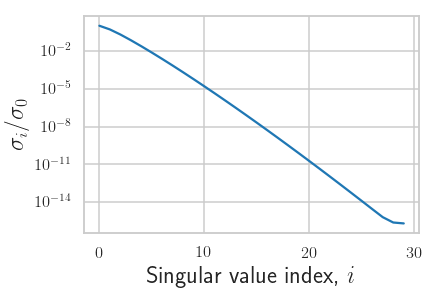

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
# plt.xkcd()
n = 1000
a = [[1.0/(i+j+1) for i in range(n)] for j in range(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s[:30]/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

Теперь попробуем аппроксимировать заданную функцию

Approximation error = 3.6130603628595414e-10


Text(0.5, 0, 'Singular value index, $i$')

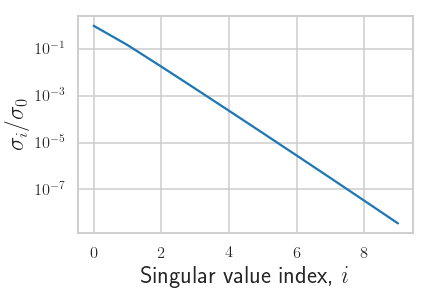

In [8]:
import numpy as np
n = 128
t = np.linspace(0, 5, n)
x, y = np.meshgrid(t, t)
f = 1.0 / (x + y + 0.5) # test your own function. Check 1.0 / (x - y + 0.5)
u, s, v = np.linalg.svd(f, full_matrices=False)
r = 10
u = u[:, :r]
s = s[:r]
v = v[:r, :] # Mind the transpose here!
fappr = u.dot(np.diag(s).dot(v))
er = np.linalg.norm(fappr - f, 'fro') / np.linalg.norm(f, 'fro')
print("Approximation error =", er)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

И несколько 3D графиков

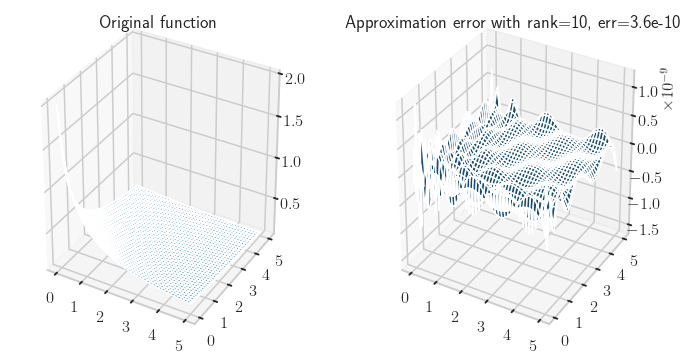

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plt.xkcd()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f)
ax.set_title('Original function')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, fappr - f)
ax.set_title('Approximation error with rank=%d, err=%3.1e' % (r, er))
fig.subplots_adjust()
fig.tight_layout()

## Сингулярные числа случайной гауссовой матрицы 

**Q** Как будут убывать сингулярные числа случайной матрицы?

Text(0.5, 0, 'Singular value index, $i$')

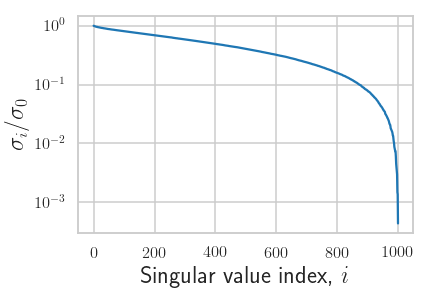

In [10]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = np.random.randn(n, n)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Линейный факторный анализ & малый ранг

Рассмотрим линейную модель 

$$y = Ax, $$ 

где $y$ вектор размерности $n$, а $x$ вектор размерности $r$.  

Данные представлены как набор объектов  

$$y_1, \ldots, y_T,$$

но мы не знаем матрицу $A$.
Факторная модель можем быть записана как  

$$
  Y = AX,
$$

где $Y$ размерности $n \times T$, $A$ – $n \times r$ и $X$ – $r \times T$. 

Это в точности модель ранга $r$: она означает, что векторы лежат в подпространстве малой размерности!  
Мы также можем использовать SVD для восстановления этого подпространства.

## Приложения SVD

SVD имеет много разных названий, например метод главных компонент (PCA), Proper Orthogonal Decomposition, Empirical Orthogonal Functions, etc

Рассмотрми следующие прикладные задачи:

1. Латентный семантический анализ
2. Коллаборативная фильтрация
3. Сжатие данных

## Латентный семантический анализ

Одно из самых известных приложений – это поиск с помощью латентного семантического представления, см например
[Deerwester, Scott C., et al. "Indexing by latent semantic analysis." (1990)](http://lsa.colorado.edu/papers/JASIS.lsi.90.pdf)  

- Постановка задачи: дан набор текстовых документов $D_1, \ldots, D_N.$ Мы хотим решить задачу поиска, то есть по данному запросу в виде последовательности слов определить наиболее близкие документы.  
- Обработка данных устроена следующим образом: для каждого документа создаётся список слов, которые в него входят, и вычисялется частота каждого слова. Такая модель называется **мешок слов** (то есть документ – это неупорядоченный набор слов).

## Матрица слов-документов

Построим матрицу $A$ слов-документов. Количество строк в неё равно числу слов в словаре. Количество столбцов равно числу документов. Элемент $A_{ij}$ – это частота встречаемости $i$-ого слова в $j$-ом документе.

Поиск выполняется умножением матрицы слов-документов на поисковый вектор, то есть на вектор, полученный из поискового запроса.

**Проблема**: документ будет выдан только если будет точное совпадение слов в нём и в поисковом запросе. Однако нам бы хотелось, чтобы на запрос "Samuel Clemens", мы получили результаты такие же, как и на запрос "Mark Twain". Но точных совпадений может и не быть!

**Q** Как может помочь SVD?

## Идея латентного семантического представления

Вычислим **малоранговое приближение** $A_r$ матрицы слов-документов $A$.  

$$A \approx A_r,$$

и **не будем следить за точностью аппроксимации**.  

Матрица $A_r$ может быть далее использована для обработки запросов.  

Спроецируем документы на малоразмерное подпространство, и для данного запроса $q$ проекция будет равна 

$$q_r = \Sigma^{-1}_r U^{\top}_r q$$

Теперь мы сможем вычислить похожесть $q_r$ и других спроецированных документов

$$\widehat{d}_i = \Sigma^{-1}_r U^{\top}_r d_i,$$

через косинус угла между вектором запроса и спроецированным вектором документа.

Демо будет на семинаре на следующей неделе.

## Коллаборативная фильтрация

- Другое важное и похожее приложение появилось из **рекомендательных систем**.  

- Пусть имеется матрица пользователей-продуктов: каждый пользователь ставит рейтинг некоторым продуктам.

- Тогда эта матрица имеет размер **число пользователей $\times$ число продуктов**. Задача – рекомендовать пользователям другие продукты, которые он мог бы купить.

- Схема остаётся прежней: вычисляем SVD, и получаем рекомендации для каждого пользователя как столбец приближённой матрицы.

Подробнее на семинаре на следующей неделе :)

## Сжатие плотных матриц

Для хранения плотных матриц размера $N \times N$ обычно необходимо $N^2$ памяти. Аппроксимация ранга $r$ позволяет сократить требуемую память до $\mathcal{O}(Nr)$

Text(0.5, 0, 'Singular value index, $i$')

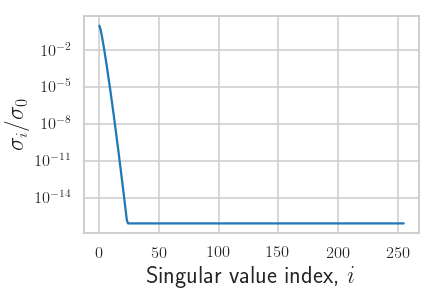

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Более реалистичный пример

Рассмотрим задачу решение линейной системы с матрицей $A$, элементы которой

$$A_{ij} = \frac{1}{i - j + \frac{1}{2}},$$

что соответствует интегральному уравнению

$$
    \int \frac{q(y)dy}{x - y } = f(x).
$$

На практике, уравнение

$$
    \int_{\Omega} \frac{q(y)dy}{\Vert x - y\Vert } = f(x),
$$

решается для $\Omega$ – поверхность в 3D. Это уравнение встречается в задачах моделирования интегральных схем. Посмотрим, что происходит с сингулярными числами.

4.884981308350689e-15

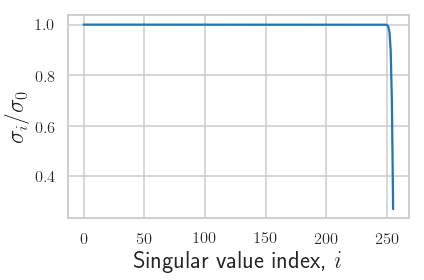

In [12]:
import numpy as np
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.plot(s / s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)
plt.tight_layout()
s[0] - np.pi

Что делать?

Идея: разбить матрицу на блоки

$$
    A = \begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
    \end{bmatrix}
$$

и оказывается, что блоки $A_{12}$ и $A_{21}$ имеют малый ранг!

Text(0.5, 0, 'Singular value index, $i$')

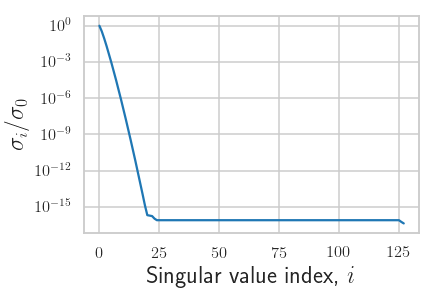

In [13]:
a12 = a[:128, 128:]
u, s, v = np.linalg.svd(a12)
plt.semilogy(s / s[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)

## Блочно-малоранговые матрицы

- Такие матрицы чаще всего встречаются при решении линейных систем, возникающих в задачах из области уравнений в частных производных 

- Другие названия: иерархические, мозаично-скелетные

## Резюме первой части

- Ранг матрицы
- Скелетное разложение и представление матрицы ранга $r$
- SVD и теорема Eckart'a-Young'a
- Приложения SVD

## План второй части лекции

- Линейные системы
- Обратная матрица
- Число обусловленности
- Метод Гаусса (Gaussian elimination)

## Линейные системы

$$ Ax = f, $$

где $A$ матрица и $f$ вектор известны.

Задача решения систем линейных уравнений – одна из основных задач вычислительной линейной алгебры.

Она возникает при решении следующих задач:

- задача линейной регрессии
- решение уравнений в частных производных и интегральных уравнений
- задачи нелинейной регрессии
- задачи оптимизации (методы Ньютона-Рафсона и Гаусса-Ньютона, условия ККТ)

## Пере- и недоопределённые линейные системы

Если система $Au = f$ имеет
- больше уравнений, чем неизвестных, она называется **переопределённой** (в общем случае не имеет решений)

- меньше уравнений, чем неизвестных, она называется **недоопределённой** (решение неединственно, нужны дополнительные предположения чтобы гарантировать единственность решения)

## Существование решений 

Решение системы линейных уравнений с квадратной матрицей $A$

$$A u = f$$

существует тогда и только тогда, когда 
* $\det A \ne 0$

или

* матрица $A$ имеет полный ранг.

## Шкала размерностей линейных систем 

В различных приложениях размерности линейных систем могут быть различны 

- Малая: $n \leq 10^4$ (вся матрица помещается в память, **плотные матрицы**)
- Средняя: $n = 10^4 - 10^6$ (обычно **разреженные** или **структурированные** матрицы)
- Большая: $n = 10^8 - 10^9$ (обычно **разреженные** матрицы и параллельные вычисления)

## Линейные системы могут быть большими

Возьмём непрерывную задачу, дискретизуем её на сетке из $N$ элементов и получим линейную систему с матрицей $N\times N$.  
Пример сетки для самолёта Airbus A319
(подробнее см. [GMSH website](http://geuz.org/gmsh/)).  
<img src="./a319_4.png" width=50%>

Основная сложность в том, что такие системы очень большие: миллионы и миллиарды неизвестных!

## Линейные системы могут быть структурированы

- Хранение $N^2$ элементов матрицы невозможно уже для $N = 100000$.  

**Q:** как работать с такими матрицами?  

**A:** к счастью, такие матрицы чаще всего являются **структурированными** и требуют хранения $\mathcal{O}(N)$ элементов.

- Наиболее растространённый тип структурированных матриц – это разреженные матрицы: такие матрицы имеют только $\mathcal{O}(N)$ не нулевых элементов!  

- Пример (одна из самых известных матриц для $n = 5$):

$$
  \begin{pmatrix}
  2 & -1 & 0 & 0 & 0 \\
  -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
  0 & 0 &-1& 2 & -1  \\
  0 & 0 & 0 & -1 & 2 \\
  \end{pmatrix}
$$

- По крайней мере можно хранить такие матрицы
- Также можно умножать такие матрицы на вектор быстро
- Но как решать линейные системы с такими матрицами?

## Основные вопросы о линейных системах

1. Какую точность мы можем получить от решения (из-за ошибок округления)?
2. Как мы вычислим решение? (LU разложение, метод Гаусса)
3. Какая сложность решения системы линейных уравнений?

## Как решать линейные системы?

**Важно**: забудьте о детерминантах и правиле Крамера (хотя они полезны для матриц $2 \times 2$)!

## Как решать линейные системы?

Основной инструмент – исключение переменных. 

\begin{align*}
    &2 y + 3 x = 5 \quad&\longrightarrow \quad &y = 5/2 -  3/2 x \\
    &2 x + 3z = 5 \quad&\longrightarrow\quad &z = 5/3 - 2/3 x\\
    &x + y = 2 \quad&\longrightarrow\quad  & 5/2 + 5/3 - (3/2 + 2/3) x = 2,\\
\end{align*}

и так вы можете найти $x$ (и все остальные неизвестные).  

Этот процесс называется **методов Гаусса** и является одним из самых сачто используемых алгоритмов. 

## Метод Гаусса

Метод Гаусса состоит из двух этапов:
1. Проход вперёд
2. Проход назад

## Проход вперёд

- Исключим $x_1$:

$$
   x_1 = f_1 - (a_{12} x_2 + \ldots + a_{1n} x_n)/a_{11},
$$

и подставим в уравнения $2, \ldots, n$. 

- Затем мы исключим $x_2$ и подставим в остальные уравнение.

- Важно, что ведущий элемент (pivots), тот на который мы делим, не равен $0$.

## Проход назад

Во время прохода назад:
- решаем уравнение для $x_n$
- подставляем решение в уравнение для $x_{n-1}$ и так далее, пока не вычислим все $x_i, i=1,\ldots, n$.

## Метод Гаусса и LU разложение

Метод Гаусса связан с вычислением одного из самых важных матричных разложений: **LU разложения**.

**Определение**: LU разложение матрицы $A$ – это представление

$$A =  LU,$$

где $L$ – **нижне-треугольная** и $U$ – **верхне-треугольная** матрица.

Это разложение **неединственно**, поэтому обычно требуют дополнительно, что на диагонали матрицы $L$ стоят 1.

**Основная цель** вычисления LU разложения – это решение системы линейных уравнений, поскольку

$$
    A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, 
$$

и задача сводится к решению двух линейных систем с верхне- и нижнетреугольных матриц.

Проход вперёд выражается в виде
$$
     L y = f, 
$$
аналогично для прохода назад
$$
   U x = y.
$$

Всегда ли существует $LU$ разложение?

## Сложность метода Гаусса/LU разложения

- Каждый шаг исключения занимает $\mathcal{O}(n^2)$ операций. 

- Таким образом, сложность алгоритма $\mathcal{O}(n^3)$.  

## Существование LU разложения

Алгоритм вычисления LU разложения работает

если **мы не делим на $0$** на каждом шаге метода Гаусса.

**Q:** Для какого класса матриц это так?

**A:** Это так для **строго регулярных матриц**.

## Строго регулрные матрицы и LU разложение

**Определение.** Матрица $A$ называется *строго регулярной*, если все лидирующие главные миноры (подматрицы из первых $k$ строк и $k$ столбцов) не вырождены. 

В этом случае LU разложение всегда существует. Обратное также верно (проверьте!).

## LU разложение для положительно определённых Эрмитовых матриц (разложение Холецкого)

Строго регулярные матрицы имеют LU разложение. 

Важный класс строго регулярных матриц – это класс **Эрмитовых положительно определённых матриц**

**Определение.** Матрица $A$ называется <font color='red'> положительно определённой </font>, если для любого $x: \Vert x \Vert \ne 0$ выполнено

$$
(x, Ax) > 0.
$$
- если это выполнено для $x \in \mathbb{C}^n$, тогда матрица $A$ эрмитова
- если это выполнено для $x \in \mathbb{R}^n$, тогда матрица $A$ может быть несимметрична

**Утверждение:** Эрмитова положительно определённая матрица $A$ строго регулярна и имеет разложение Холецкого вида

$$A = RR^*,$$

где $R$ нижнетреугольная матрица.

Часто матрица $R$ называется "квадратным корнем" матрицы $A$. 

## Вычисление LU разложения

Во многих случаях достаточно один раз вычислить LU разложение!

Если такое разложение найдено (что требует $\mathcal{O}(n^3)$ операций), тогда решение линейной системы сводится к решению линейных систем с матрицами $L$ и $U$, которые требуют $\mathcal{O}(n^2)$ операций.

**Упражнение:** Решение линейной системы с треугольной матрицей вычисляется быстро. Как вычислить $L$ и $U$?

## Когда алгоритм вычисления LU разложения не работает

- Что случится, если матрица не является строго регулярной (или ведущий элемент в методе Гаусса очень мал)?   

- Классический пример матрицы $2 \times 2$ с "плохим" LU разложением:

$$
    A = \begin{pmatrix}
    \varepsilon & 1 \\
    1 & 1 
    \end{pmatrix}
$$

- Если $\varepsilon$ достаточно мал, мы можем встретиться с неустойчивостью. В то время как вычисление разложения Холецкого всегда устойчив.

Проверим это численно...

In [14]:
import numpy as np
eps = 1e-18#1.12e-16
a = [[eps, 1],[1.0,  1]]
a = np.array(a)
a0 = a.copy()
n = a.shape[0]
L = np.zeros((n, n))
U = np.zeros((n, n))
for k in range(n): #Eliminate one row   
    L[k, k] = 1
    for i in range(k+1, n):
        L[i, k] = a[i, k] / a[k, k]
        for j in range(k+1, n):
            a[i, j] = a[i, j] - L[i, k] * a[k, j]
    for j in range(k, n):
        U[k, j] = a[k, j]

print('L * U - A:\n', np.dot(L, U) - a0)
L

L * U - A:
 [[ 0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16 -1.00000000e+00]]


array([[1.e+00, 0.e+00],
       [1.e+18, 1.e+00]])

## Выбор ведущего элемента (pivoting)

Мы моджем пеерставить строки и столбцы матрицы $A$ так, чтобы элемент $A_{kk}$, на который мы делим был максимальным.  

Простейшая, но эффективная стратегия – это выбор максимального элемента в строке: на каждом шаге выбираем элемент, который максимален по модулю и перемещаем его на диагональ.

Это даёт следующее разложение 

$$A = P L U,$$

где $P$ – это **матрица перестановки**.


- Почему это хорошая стратегия?

## Устойчивость линейных систем

- Существует фундаментальная проблема с ршением систем линейных уравнений, которая не зависит от импользуемого алгоритма.

- Она проявляется, когда элементы матрицы представляются как числа с плавающей точкой или имеется некоторый шум в измерениях.

Проиллюстрируем эту проблему на следующем примере.

2.095164779214391


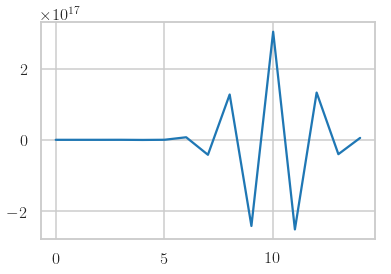

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
n = 15
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
x = np.linalg.solve(a, rhs) #This function computes LU-factorization and solves linear system

#And check if everything is fine
er = np.linalg.norm(a.dot(x) - rhs) / np.linalg.norm(rhs)
print(er)
plt.plot(x)

## Линейные системы и обратная матрица

- В чём проблема в предыдущем примере? 

- Почему ошибка растёт так быстро?  

- И мы приходим к одному из главных понятий вычислительной линейной алгебры: числу обусловленности матрицы.  

Но перед этим нам нужно определить **обратную матрицу**.

## Обратная матрица: определение

Матрица обратная к матрице $A$ определена как матрица $X$ такая что  

$$
   AX = XA = I, 
$$

где $I$ – единичная матрица. Обратная матрица обозначается как $A^{-1}$.

Вычисление обратной матрицы связано с решением линейной системы. В самом деле, $i$-ый столбец произведения даёт

$$
A x_i = e_i,
$$

где $e_i$ – $i$-ый столбец единичной матрицы. 
Таким образом, мы можем использовать метод Гаусса, чтобы решить эту систему.


## Обратная матрица и линейные системы

Если у нас есть обратная матрица $A^{-1}$, тогда решение линейной системы

$$Ax = f$$

выражается как $x = A^{-1} f$.  

В самом деле,  

$$   
    A(A^{-1} f) = (AA^{-1})f = I f = f.
$$

## Ряд Неймана

Для того чтобы выяснить, почему в решениии была такая большая ошибка нам потребуется важный вспомогательный результат.  

**Ряд Неймана**:  

Если матрица $F$ такая что $\Vert F \Vert < 1$, тогда матрица $(I - F)$ обратима и

$$(I - F)^{-1} = I + F + F^2 + F^3 + \ldots = \sum_{k=0}^{\infty} F^k.$$

Заметим, что это матричная версия выражения для суммы геометрической прогрессии. 

**Q**: какая норма тут используется? Какая норма "самая лучшая" в данном случае?

## Доказательство

Сначала докажем, что ряд $\sum_{k=0}^{\infty} F^k$ сходится.  

Как и в скалярном случае выполнено
$$
   (I - F) \sum_{k=0}^N F^k = (I - F^{N+1}) \rightarrow I, \quad N \to +\infty
$$

Действительно, 
$$
\| (I - F^{N+1}) - I\| = \|F^{N+1}\| \leqslant \|F\|^{N+1} \to 0, \quad N\to +\infty.
$$

Также можем оценить **норму обратной матрицы**:
$$
  \left\Vert \sum_{k=0}^N F^k \right\Vert \leq \sum_{k=0}^N \Vert F \Vert^k \Vert I \Vert \leq \frac{\Vert I \Vert}{1 - \Vert F \Vert} 
$$

## Малое возмущение обратной матрицы

Используя этот результат, мы можем оценить как возмущение в элементах матрицы влияет на возмущение в элементах обратной матрицы. Предположим, что возмущение $E$ мало в том смысле, что $\Vert A^{-1} E \Vert < 1$. Тогда

$$(A + E)^{-1} = \sum_{k=0}^{\infty} (-A^{-1} E)^k A^{-1}$$

и более того, 

$$
  \frac{\Vert (A + E)^{-1} - A^{-1} \Vert}{\Vert A^{-1} \Vert} \leq \frac{\Vert A^{-1} \Vert \Vert E \Vert \Vert I \Vert}{1 - \Vert A^{-1} E \Vert}.
$$

Видно, что норма обратной матрицы входит в оценку.

## Число обусловленности линейной системы

Рассмотрим **возмущённую** возмущённую линейную систему:

$$
   (A + \Delta A) \widehat{x} = f + \Delta f.
$$

## Оценки!

$$
\begin{split}
\widehat{x} - x &= (A + \Delta A)^{-1} (f + \Delta f) - A^{-1} f =\\ 
&= \left((A + \Delta A)^{-1} - A^{-1}\right)f + (A + \Delta A)^{-1} \Delta f = \\
&= \Big[\sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k\Big] A^{-1} f + \Big[\sum_{k=0}^{\infty} (A^{-1} \Delta A)^k \Big] A^{-1} \Delta f,
\end{split}
$$  
поэтому
$$
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq 
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A^{-1}\Delta A\|} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \leq \\
\leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A\|\|A^{-1}\|\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \equiv \\
\equiv &\frac{\mathrm{cond}(A)}{1 - \mathrm{cond}(A)\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big)
\end{split}
$$

Главную роль играет **число обусловленности** матрицы $A$: $\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert$.

## Число обусловленности

- Чем больше число обусловленности, тем меньше цифр в записи числа мы можем правильно восстановить. 
- Число обусловленности разное для разных норм.
- Для спектральной нормы выполнено (проверьте!) $\mathrm{cond}_2 (A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\sigma_{\max}}{\sigma_{\min}}$
- Заметим, что если $\Delta A = 0$, тогда

$$
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \frac{\|\Delta f\|}{\|f\|}
$$

## И снова матрица Гильберта 

- Проверим насколько оценка точная в обоих случаях: единичная правая часть и случайная правая часть (вспомните пример с прошлой лекции!)
- Результаты существенно отличаются!

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 1000
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print('Error:', er, 'Condition number:', cn)

Error: 2.217472233227586e-06 Condition number: 4.492167979846466e+20


Error: 9.698022727227913 Condition number: 4.073996146476839e+19


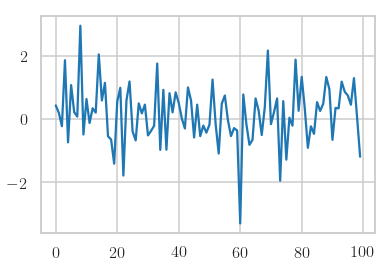

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print('Error:', er, 'Condition number:', cn)

u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))

### Как это объяснить?

## Переопределённые линейные системы

- Рассмотрим переопределённые линейные системы, в которых число уравнений больше чем число неизвестных.
- Простейший пример: аппроксимация точек на плоскости с помощью линейной модели

Стандартный способ минимизации невязки (**линейная задача наименьших квадратов**)

$$\Vert A x - b \Vert_2 \rightarrow \min$$

## Переопределённая система и матрица Грама

Условие оптимальности $0\equiv \nabla \left(\|Ax-b\|_2^2\right)$, где $\nabla$ обозначает градиент. Поэтому,

$$
0 \equiv \nabla \left(\|Ax-b\|_2^2\right) = 2(A^*A x - A^*b) = 0.
$$

Таким образом,

$$
\quad A^* A x = A^* b
$$

Матрица $A^* A$ называется **матрицей Грама**, а система называется **нормальным уравнением**. 

- Число обусловленности матрицы $A^* A$ равно квадрату числа обусловленности матрицы $A$ (проверьте!).
- Поэтому решать нормальное уравнение в таком виде – не самая хорошая идея!

## Псевдообратная матрица

Матрица $A^* A$ может быть вырождена в общем случае (почему?).
Поэтому, необходимо ввести понятие псевдообратной матрицы  $A^{\dagger}$ такой что <br>
решение линейной задачи наименьших квадратов можно было записать в виде

$$x = A^{\dagger} b.$$

Матрица $$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*$$ называется псевдообратной матрицей Мура-Пенроуза для матрицы $A$.

* Если матрица $A$ имеет полный ранг, тогда $A^* A$ невырождена и мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*$.

* Если матрица $A$ квадратная и невырожденная мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$ – обычная обратная матрица для $A$

* Если $A$ имеет линейно зависимые столбцы, тогда $A^\dagger b$ даёт решение минимальной евклидовой нормы. 

## Вычисление псевдообратной матрицы с помощью SVD

Пусть $A = U \Sigma V^*$ SVD для матрицы $A$. Тогда,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*,$$

* Вы мождете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел <br>
* Если сингулярные числа малы, их можно не обращать. Это даст решение менее чувствительное к шуму в правой части

**Q** что произошло с числом обусловленности?

## Стандартный способ решения линейной задачи наименьших квадратов

Использование $QR$ разложения

Любая матрица может быть представлена в виде 

$$
A = Q R,
$$
где $Q$ – унитарная матрица, и $R$ – верхнетреугольная.

Тогда, если $A$ имеет полный ранг, тогда

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$ 

Таким образом, задача поиска оптимального $x$ эквивалентна решению следующей квадратной системы 

$$
Rx = Q^* b.
$$

Так как $R$ верхнетреугольная, решение этой системы требует $\mathcal{O}(n^2)$ операций. Также этот способ более устойчив, чем использование псевдообратной матрицы напрямую.

## Пример линейнеой задачи наименьших квадратов

Рассмотрим двумерный пример. Пусть дана линейная модель 

$$y = ax + b$$

и зашумлённые данные $(x_1, y_1), \dots (x_n, y_n)$. Тогда линейная система на коэффициенты будет выглядеть как 

$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$
или в матричном виде
$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$
что является переопределённой системой

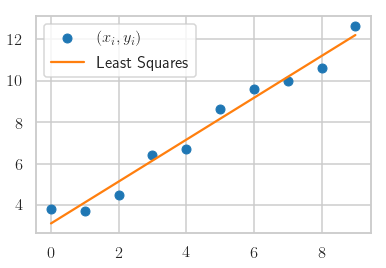

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a_exact = 1.
b_exact = 2.

n = 10
xi = np.arange(n)
yi = a_exact * xi + b_exact + 2*np.random.random(n)

A = np.array([xi, np.ones(n)])
coef = np.linalg.pinv(A).T.dot(yi) # coef is [a, b]

plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least Squares')
plt.legend(loc='best')

## Резюме по второй части

- Линейные системы можно решать методов Гаусса, сложность – $\mathcal{O}(n^3)$.
- Линейные системы можно решать с помощью LU разложения, сложность – $\mathcal{O}(n^3)$ для разложения, и  $\mathcal{O}(n^2)$ для каждой правой части
- Линейная заадча наименьших квадратов может быть решена с помощью решения нормального уравнения (bad)
- Линейная заадча наименьших квадратов может быть решена с помощью QR разложения (стандартный подход)

## Анонс на следующие две недели

- Лекций не будет
- Будут семинары
- Подготовьте вопросы по этой лекции
- Будем разбирать приложения и практические аспекты всего того, что сегодня успели обсудить